In [ ]:
from google.colab import drive
drive.mount('/content/drive')

source_folder = '/content/drive/MyDrive/impress'

Mounted at /content/drive


# Moissonnage

In [ ]:
pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import os

# Dossier sur Google Drive pour sauvegarder les fichiers
output_folder = '/content/drive/MyDrive/impress/scraped_data'
os.makedirs(output_folder, exist_ok=True)

# URL racine
base_url = "https://tccmontreal.com"
visited = set()  # Pour garder une trace des pages visitées

# Fonction pour générer un nom de fichier descriptif
def generate_filename(href, index):
    name = href.split("/")[-1]
    if not name or "?" in name:
        name = f"resource_{index}"
    return name

# Fonction pour télécharger un fichier PDF
def download_pdf(url, filename):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(os.path.join(output_folder, filename), 'wb') as file:
                file.write(response.content)
            print(f"Downloaded PDF: {filename}")
        else:
            print(f"Failed to download PDF: {url} (Status code: {response.status_code})")
    except Exception as e:
        print(f"Error downloading PDF {url}: {e}")

# Fonction pour scraper une page et trouver des PDF
def scrape_page(url):
    if url in visited:  # Évite les visites répétées
        return
    visited.add(url)  # Marque la page comme visitée

    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            links = soup.find_all('a', href=True)

            for index, link in enumerate(links):
                href = link['href']

                # Corrige les liens relatifs pour obtenir des URLs absolues
                if not href.startswith("http"):
                    href = base_url + href

                # Télécharger les PDF
                if href.endswith('.pdf'):
                    filename = generate_filename(href, index) + '.pdf'
                    download_pdf(href, filename)

                # Explorer les pages HTML du site
                elif base_url in href and href not in visited:
                    scrape_page(href)
        else:
            print(f"Failed to fetch: {url} (Status code: {response.status_code})")
    except Exception as e:
        print(f"Error fetching {url}: {e}")

# Lancer le scraping à partir de la racine
scrape_page(base_url)

Downloaded PDF: guide-tcc-tdm-arb.pdf.pdf
Downloaded PDF: guide-tcc-tdm-patients-arb.pdf.pdf
Downloaded PDF: trouble-panique-avec-ou-sans-agoraphobie-arabe.pdf.pdf
Downloaded PDF: guide-de-pratique-pour-levaluation-et-le-traitement-cognitivo-comportemental-du-tas.pdf.pdf
Downloaded PDF: guide-gestion-de-colere-arb.pdf.pdf
Downloaded PDF: guide-de-pratiquep-our-lecc81valuation-et-traitement-toc.pdf.pdf
Downloaded PDF: mini-guide-dbt-arb.pdf.pdf
Downloaded PDF: guide-schema-final-1-arb-avec-isbn.pdf.pdf
Downloaded PDF: guide-de-pratique-ptsd-arb-isbn-1.pdf.pdf
Downloaded PDF: tcc-para-tdm-texto-definitivo.pdf.pdf
Failed to fetch: https://tccmontreal.com/r.php?locale=en_US (Status code: 404)
Failed to fetch: https://tccmontreal.com/r.php?r=101 (Status code: 404)
Failed to fetch: https://tccmontreal.com/reg/ (Status code: 404)
Failed to fetch: https://tccmontreal.com/login/ (Status code: 403)
Failed to fetch: https://tccmontreal.com/lite/ (Status code: 404)
Failed to fetch: https://tccmont

KeyboardInterrupt: 

# Nettoyage

In [ ]:
import os
import hashlib

# Chemin du dossier contenant les fichiers
data_folder = '/content/drive/MyDrive/impress/scraped_data'

# Fonction pour calculer le hash d'un fichier
def calculate_file_hash(file_path):
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        while chunk := f.read(8192):
            hasher.update(chunk)
    return hasher.hexdigest()

# Identifier et supprimer les doublons
def remove_duplicates(folder):
    hashes = {}
    filenames = set()
    duplicates = []

    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        if os.path.isfile(file_path):
            # Vérifier les doublons basés sur le titre du fichier
            if file in filenames:
                duplicates.append(file_path)
                continue
            filenames.add(file)

            # Vérifier les doublons basés sur le contenu (hash)
            file_hash = calculate_file_hash(file_path)
            if file_hash in hashes:
                duplicates.append(file_path)
            else:
                hashes[file_hash] = file_path

    # Supprimer les fichiers en double
    for duplicate in duplicates:
        print(f"Removing duplicate: {duplicate}")
        os.remove(duplicate)

# Exécuter la suppression des doublons
remove_duplicates(data_folder)

# Head of files

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 72.6 MB/s eta 0:00:00


In [ ]:
import os
import pdfplumber

# Chemin du dossier contenant les fichiers
data_folder = '/content/drive/MyDrive/impress/scraped_data'

# Fonction pour afficher le contenu d'un fichier texte
def display_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
        print(content[:500])  # Affiche les 500 premiers caractères

# Fonction pour afficher le contenu d'un PDF
def display_pdf_file(file_path):
    with pdfplumber.open(file_path) as pdf:
        text = ''
        for page in pdf.pages[:3]:  # Limite l'affichage aux 3 premières pages
            text += page.extract_text() + '\n'
        print(text[:500])  # Affiche les 500 premiers caractères

# Parcourir les fichiers et traiter selon leur type
for file in os.listdir(data_folder):
    file_path = os.path.join(data_folder, file)
    print(f"--- {file} ---")
    if file.endswith('.txt'):
        try:
            display_text_file(file_path)
        except UnicodeDecodeError as e:
            print(f"Error reading text file {file}: {e}")
    elif file.endswith('.pdf'):
        try:
            display_pdf_file(file_path)
        except Exception as e:
            print(f"Error reading PDF file {file}: {e}")
    print("\n")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
0000005463 00000 n
0000005745 00000 n
0000008410 00000 n
0000011056 00000 n
0000011355 00000 n
0000011380 00000 n
0000011525 00000 n
0000014218 00000 n
0000014531 00000 n
0000014779 00000 n
0000015195 00000 n
0000015816 00000 n
0000


--- ?share=twitter.txt ---



x.com




































--- ?share=facebook.txt ---


Facebook




FacebookEmail or phonePasswordForgot account?Sign UpNoticeYou must log in to continue.Log into FacebookLog InForgot account?Create new accountEnglish (US)EspañolFrançais (France)中文(简体)العربيةPortuguês (Brasil)Italiano한국어Deutschहिन्दी日本語Sign UpLog InMessengerFacebook LiteVideoPlacesGamesMarketplaceMeta PayMeta StoreMeta QuestRay-Ban MetaMeta AIInstagramThreadsFundraisersServicesVoting Information CenterPrivacy PolicyConsumer Health PrivacyPrivacy CenterGroupsAboutCreate adCreate Pa


--- guide_0.txt ---





Thérapie cognitivo-comportementale: guides de pratiques et 

# Conversion

In [ ]:
import os
import pdfplumber

# Paths
data_folder = '/content/drive/MyDrive/impress/scraped_data'
converted_folder = '/content/drive/MyDrive/impress/converted_texts'
os.makedirs(converted_folder, exist_ok=True)

def convert_pdf_to_text(pdf_path, output_path):
    try:
        with pdfplumber.open(pdf_path) as pdf:
            text = ''
            for page in pdf.pages:
                text += page.extract_text() + '\n'
        with open(output_path, 'w', encoding='utf-8') as f:
            f.write(text)
        print(f"Converted: {os.path.basename(pdf_path)} -> {os.path.basename(output_path)}")
    except Exception as e:
        print(f"Error converting {pdf_path}: {e}")

# Process all files in the folder
for file in os.listdir(data_folder):
    if file.endswith('.pdf'):
        pdf_path = os.path.join(data_folder, file)
        txt_filename = file.replace('.pdf', '.txt')
        output_path = os.path.join(converted_folder, txt_filename)
        convert_pdf_to_text(pdf_path, output_path)

Converted: manuel-tcc-feuillet-publicitaire.pdf.pdf -> manuel-tcc-feuillet-publicitaire.txt.txt
Converted: guide-tcc-tdm-arb.pdf.pdf -> guide-tcc-tdm-arb.txt.txt
Converted: guide-tcc-tdm-patients-arb.pdf.pdf -> guide-tcc-tdm-patients-arb.txt.txt
Converted: trouble-panique-avec-ou-sans-agoraphobie-arabe.pdf.pdf -> trouble-panique-avec-ou-sans-agoraphobie-arabe.txt.txt
Converted: guide-de-pratique-pour-levaluation-et-le-traitement-cognitivo-comportemental-du-tas.pdf.pdf -> guide-de-pratique-pour-levaluation-et-le-traitement-cognitivo-comportemental-du-tas.txt.txt
Converted: guide-gestion-de-colere-arb.pdf.pdf -> guide-gestion-de-colere-arb.txt.txt
Converted: guide-de-pratiquep-our-lecc81valuation-et-traitement-toc.pdf.pdf -> guide-de-pratiquep-our-lecc81valuation-et-traitement-toc.txt.txt
Converted: mini-guide-dbt-arb.pdf.pdf -> mini-guide-dbt-arb.txt.txt
Converted: guide-schema-final-1-arb-avec-isbn.pdf.pdf -> guide-schema-final-1-arb-avec-isbn.txt.txt
Converted: guide-de-pratique-ptsd-

# Quality Assessment


In [ ]:
pip install chardet


In [ ]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read(1024)  # Lit les 1024 premiers octets
        result = chardet.detect(raw_data)
    return result['encoding']

In [ ]:
import os
import re
import chardet

# Fonction de nettoyage
def clean_text(text):
    # Supprime les balises HTML
    text = re.sub(r'<[^>]+>', '', text)
    # Supprime les caractères spéciaux
    text = re.sub(r'[^\w\s]', '', text)
    # Supprime les espaces multiples
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Dossier contenant les fichiers
folder = '/content/drive/MyDrive/impress/converted_texts'

cleaned_texts = []
files = os.listdir(folder)

for file in files:
    file_path = os.path.join(folder, file)
    try:
        # Détecte l'encodage
        encoding = detect_encoding(file_path)
        if not encoding:
            print(f"Skipping file due to unknown encoding: {file}")
            continue

        # Lit le fichier avec l'encodage détecté
        with open(file_path, 'r', encoding=encoding) as f:
            content = f.read()
            cleaned_text = clean_text(content)
            cleaned_texts.append(cleaned_text)
            print(f"Cleaned: {file}")
    except Exception as e:
        print(f"Error processing file {file}: {e}")

Cleaned: manuel-tcc-feuillet-publicitaire.txt.txt
Cleaned: guide-tcc-tdm-arb.txt.txt
Cleaned: guide-tcc-tdm-patients-arb.txt.txt
Cleaned: trouble-panique-avec-ou-sans-agoraphobie-arabe.txt.txt
Cleaned: guide-de-pratique-pour-levaluation-et-le-traitement-cognitivo-comportemental-du-tas.txt.txt
Cleaned: guide-gestion-de-colere-arb.txt.txt
Cleaned: guide-de-pratiquep-our-lecc81valuation-et-traitement-toc.txt.txt
Cleaned: mini-guide-dbt-arb.txt.txt
Cleaned: guide-schema-final-1-arb-avec-isbn.txt.txt
Cleaned: guide-de-pratique-ptsd-arb-isbn-1.txt.txt
Cleaned: tcc-para-tdm-texto-definitivo.txt.txt
Cleaned: guide-de-pratique-dc3a9pression-manuel-patient-20181.txt.txt
Cleaned: inventaire-de-beck-pour-la-dc3a9pression.txt.txt
Cleaned: inventaire-de-beck-pour-l_anxic3a9tc3a9.txt.txt
Cleaned: phq-9.txt.txt
Cleaned: registre-des-activitc3a9s-quotidiennes-pm.txt.txt
Cleaned: registre-des-activitc3a9s-quotidiennes-pmt.txt.txt
Cleaned: liste-d_activitc3a9s.txt.txt
Cleaned: tableau-d_enregistrement-de

In [ ]:
keywords = ['distorsion', 'cognitive', 'exposition', 'anxiété']
keyword_counts = {key: sum(text.count(key) for text in cleaned_texts) for key in keywords}
print(keyword_counts)

{'distorsion': 6, 'cognitive': 138, 'exposition': 64, 'anxiété': 235}


In [ ]:
lengths = [len(text.split()) for text in cleaned_texts]
print(f"Longueur moyenne : {sum(lengths)/len(lengths)} mots")

Longueur moyenne : 2347.735849056604 mots


# Tokenization

In [ ]:
import os
import pandas as pd

# Dossier contenant les fichiers texte nettoyés
cleaned_folder = '/content/drive/MyDrive/impress/converted_texts'

# Créer une liste pour stocker les textes
texts = []

# Charger tous les fichiers texte
for file in os.listdir(cleaned_folder):
    if file.endswith('.txt'):
        file_path = os.path.join(cleaned_folder, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            texts.append(f.read())

# Sauvegarder en CSV pour le dataset
dataset_path = '/content/drive/MyDrive/impress/fine_tuning_dataset.csv'
df = pd.DataFrame({"text": texts})
df.to_csv(dataset_path, index=False, escapechar="\\")
print(f"Dataset sauvegardé sous : {dataset_path}")

Dataset sauvegardé sous : /content/drive/MyDrive/impress/fine_tuning_dataset.csv


In [ ]:
import pandas as pd

# Chemin vers le dataset nettoyé
dataset_path = '/content/drive/MyDrive/impress/fine_tuning_dataset.csv'
df = pd.read_csv(dataset_path)

# Vérifier les valeurs manquantes ou non valides dans la colonne "text"
print(df["text"].isnull().sum())  # Nombre de valeurs manquantes
print(df["text"].dtype)  # Type des valeurs

# Supprimer les lignes avec des valeurs manquantes
df = df.dropna(subset=["text"])

# Convertir toutes les valeurs en chaînes de caractères (au cas où certaines ne le sont pas)
df["text"] = df["text"].astype(str)

print("Dataset nettoyé et prêt pour la tokenisation.")

# Vérifie le contenu
print(df.head())

3
object
Dataset nettoyé et prêt pour la tokenisation.
                                                text
0  Jetez les bases\nd’une pratique\nthérapeutique...
2  ﻲﻛوﻠﺳﻟا ﻲﻓرﻌﻣﻟا جﻼﻌﻠﻟ ﺔﺳرﺎﻣﻣﻟا لﯾﻟد\nﻰﺿرﻣﻠﻟ ﻲﻣ...
3  Jean Goulet, Louis Chaloult et Thanh-Lan Ngô\n...
4                         Louis Chaloult\nThanh-Lanو
5                                              ﺐﻀﻐﻟا


In [ ]:
from datasets import Dataset

# Convertir le DataFrame en Dataset Hugging Face
dataset = Dataset.from_pandas(df)

print("Dataset Hugging Face créé.")

Dataset Hugging Face créé.


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_dataset = dataset.map(tokenize_function, batched=True)

print("Dataset tokenisé avec succès !")

Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Dataset tokenisé avec succès !


In [ ]:
from transformers import CamembertForMaskedLM
import os

# Paths for saving the model and tokenized dataset
model_save_path = '/content/drive/MyDrive/impress/modèles'
tokenized_dataset_save_path = '/content/drive/MyDrive/impress/tokenized_data'

# Ensure directories exist
os.makedirs(model_save_path, exist_ok=True)
os.makedirs(tokenized_dataset_save_path, exist_ok=True)

# Save the model
model.save_pretrained(model_save_path)
print(f"Model saved at: {model_save_path}")

# Save the tokenized dataset
tokenized_dataset.save_to_disk(tokenized_dataset_save_path)
print(f"Tokenized dataset saved at: {tokenized_dataset_save_path}")

Model saved at: /content/drive/MyDrive/impress/modèles


Saving the dataset (0/1 shards):   0%|          | 0/105 [00:00<?, ? examples/s]

Tokenized dataset saved at: /content/drive/MyDrive/impress/tokenized_data


# Finetuning (Tous les modèles)

### Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

source_folder = '/content/drive/MyDrive/impress'

Mounted at /content/drive


In [ ]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 11.6 MB/s eta 0:00:00


In [ ]:
pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForMaskedLM,
    Trainer,
    TrainingArguments,
    DataCollatorForLanguageModeling
)
from datasets import load_from_disk
import os

In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForMaskedLM,
    Trainer,
    TrainingArguments,
    DataCollatorForLanguageModeling
)
from datasets import load_from_disk
import os
import gc

# Désactiver WandB et activer les segments de mémoire expansibles
os.environ["WANDB_DISABLED"] = "true"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Charger le dataset tokenisé
tokenized_dataset = load_from_disk('/content/drive/MyDrive/impress/tokenized_data')

## CamemBERT

In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForMaskedLM,
    Trainer,
    TrainingArguments,
    DataCollatorForLanguageModeling
)
from datasets import load_from_disk
import os

In [ ]:
pip install transformers datasets

In [ ]:
from transformers import Trainer, TrainingArguments
from datasets import load_from_disk

# Charger le modèle, le tokenizer et le dataset tokenisé
from transformers import CamembertTokenizer, CamembertForMaskedLM

tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
model = CamembertForMaskedLM.from_pretrained("camembert-base")
tokenized_dataset = load_from_disk('/content/drive/MyDrive/impress/tokenized_data')

print("Modèle, tokenizer et dataset chargés avec succès.")

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--camembert-base/snapshots/bc87ad459e7847ef97658d7db26d402162167ed5/sentencepiece.bpe.model
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--camembert-base/snapshots/bc87ad459e7847ef97658d7db26d402162167ed5/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--camembert-base/snapshots/bc87ad459e7847ef97658d7db26d402162167ed5/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--camembert-base/snapshots/bc87ad459e7847ef97658d7db26d402162167ed5/config.json
Model config CamembertConfig {
  "_name_or_path": "camembert-base",
  "architectures": [
    "CamembertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 5,
  "classifier_dropout": null,
  "

Modèle, tokenizer et dataset chargés avec succès.


In [ ]:
from transformers import TrainingArguments
import os

os.environ["WANDB_DISABLED"] = "true"
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/impress/modèles/camembert-base',
    overwrite_output_dir=True,
    num_train_epochs=5,  # Nombre d'époques pour converger
    per_device_train_batch_size=64,  # Taille de batch optimisée pour A100
    gradient_accumulation_steps=2,  # Ajuste si nécessaire
    learning_rate=2e-5,  # Taux d'apprentissage ajusté pour stabilité
    weight_decay=0.01,  # Limite l'overfitting
    save_steps=1000,  # Sauvegarde régulière des checkpoints
    save_total_limit=2,  # Garde les 2 derniers checkpoints
    logging_dir='/content/drive/MyDrive/impress/modèles/logs/camembert-base',  # Logs sauvegardés ici
    logging_steps=100,  # Logs fréquents
    logging_strategy="steps",  # Log à chaque étape
    fp16=True,  # Précision mixte pour A100
    report_to=[],  # Désactive WandB, TensorBoard, etc.
    log_level="info",  # Niveau de log
    log_level_replica="info"  # Même niveau pour les réplicas en cas d'entraînement multi-GPU
)

print("Hyperparamètres configurés.")

PyTorch: setting up devices


Hyperparamètres configurés.


In [ ]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15,  # Proportion de tokens masqués
)

print("Data collator configuré.")

Data collator configuré.


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,  # Utiliser tout le dataset
    data_collator=data_collator,
)

print("Trainer configuré.")

Using auto half precision backend


Trainer configuré.


In [ ]:
trainer.train()
print("Fine-tuning terminé.")

The following columns in the training set don't have a corresponding argument in `CamembertForMaskedLM.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `CamembertForMaskedLM.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 105
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 2
  Total optimization steps = 5
  Number of trainable parameters = 110,655,493


Step,Training Loss


Saving model checkpoint to /content/drive/MyDrive/impress/modèles/camembert-base/checkpoint-5
Configuration saved in /content/drive/MyDrive/impress/modèles/camembert-base/checkpoint-5/config.json
Model weights saved in /content/drive/MyDrive/impress/modèles/camembert-base/checkpoint-5/model.safetensors


Training completed. Do not forget to share your model on huggingface.co/models =)




Fine-tuning terminé.


In [ ]:
model_save_path = '/content/drive/MyDrive/impress/modèles/camembert-base'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"Modèle sauvegardé à : {model_save_path}")

Configuration saved in /content/drive/MyDrive/impress/modèles/camembert-base/config.json
Model weights saved in /content/drive/MyDrive/impress/modèles/camembert-base/model.safetensors
tokenizer config file saved in /content/drive/MyDrive/impress/modèles/camembert-base/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/impress/modèles/camembert-base/special_tokens_map.json
added tokens file saved in /content/drive/MyDrive/impress/modèles/camembert-base/added_tokens.json


Modèle sauvegardé à : /content/drive/MyDrive/impress/modèles/camembert-base


In [ ]:
def clean_token(token):
    # Retirer le préfixe "▁" ajouté par SentencePiece
    return token.replace('▁', '')

# Exemple de phrase avec des <mask>
text = "La thérapie cognitive-comportementale est utilisée pour traiter <mask> et <mask>."

# Détecter l'appareil (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Déplacer le modèle sur le GPU
model = model.to(device)

# Tokeniser le texte et déplacer les données sur le GPU
inputs = tokenizer(text, return_tensors="pt").to(device)

# Obtenir les logits du modèle
outputs = model(**inputs)
logits = outputs.logits

# Trouver les indices des tokens <mask>
mask_token_index = (inputs.input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

# Obtenir les prédictions pour les positions <mask>
predicted_ids = logits[0, mask_token_index].argmax(dim=-1)
predicted_tokens = tokenizer.convert_ids_to_tokens(predicted_ids)

# Nettoyer les tokens et remplacer dans le texte
completed_text = text
for token, index in zip(predicted_tokens, mask_token_index):
    completed_text = completed_text.replace("<mask>", clean_token(token), 1)

print(f"Texte original : {text}")
print(f"Texte complété : {completed_text}")


Texte original : La thérapie cognitive-comportementale est utilisée pour traiter <mask> et <mask>.
Texte complété : La thérapie cognitive-comportementale est utilisée pour traiter dépression et dépression.


## FlauBERT

In [ ]:
# Dossier de sauvegarde
output_dir = "/content/drive/MyDrive/impress/modèles/flaubert_base_cased"
os.makedirs(output_dir, exist_ok=True)

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("flaubert/flaubert_base_cased")
model = AutoModelForMaskedLM.from_pretrained("flaubert/flaubert_base_cased")

# Préparer le collator pour MLM
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)

# Limiter la longueur des séquences
tokenized_dataset = tokenized_dataset.map(
    lambda examples: tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=128  # Limite les séquences
    ),
    batched=True
)

# Configurer les hyperparamètres
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=64,
    gradient_accumulation_steps=2,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_steps=1000,
    save_total_limit=2,
    logging_dir=f"{output_dir}/logs",
    logging_steps=100,
    logging_strategy="steps",
    fp16=True,
    report_to=[],
    log_level="info",
    log_level_replica="info"
)

# Libérer la mémoire avant l'entraînement
torch.cuda.empty_cache()
gc.collect()

# Configurer le Trainer
trainer = Trainer(
    model=model.to("cuda"),
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
)

# Lancer le fine-tuning
trainer.train()
print("Fine-tuning terminé pour le modèle : flaubert/flaubert_base_cased")

# Sauvegarder le modèle fine-tuné
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"Modèle sauvegardé à : {output_dir}")

tokenizer_config.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--flaubert--flaubert_base_cased/snapshots/f681df336b523e136915ae97bc8bd0ef4933ae36/config.json
Model config FlaubertConfig {
  "_name_or_path": "flaubert/flaubert_base_cased",
  "amp": 1,
  "architectures": [
    "FlaubertWithLMHeadModel"
  ],
  "asm": false,
  "attention_dropout": 0.1,
  "bos_index": 0,
  "bos_token_id": 0,
  "bptt": 512,
  "causal": false,
  "clip_grad_norm": 5,
  "dropout": 0.1,
  "emb_dim": 768,
  "embed_init_std": 0.02209708691207961,
  "encoder_only": true,
  "end_n_top": 5,
  "eos_index": 1,
  "fp16": true,
  "gelu_activation": true,
  "group_by_size": true,
  "id2lang": {
    "0": "fr"
  },
  "init_std": 0.02,
  "is_encoder": true,
  "lang2id": {
    "fr": 0
  },
  "lang_id": 0,
  "langs": [
    "fr"
  ],
  "layer_norm_eps": 1e-12,
  "layerdrop": 0.0,
  "lg_sampling_factor": -1,
  "lgs": "fr",
  "mask_index": 5,
  "mask_token_id": 0,
  "max_batch_size": 0,
  "max_position_em

vocab.json:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/896k [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--flaubert--flaubert_base_cased/snapshots/f681df336b523e136915ae97bc8bd0ef4933ae36/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--flaubert--flaubert_base_cased/snapshots/f681df336b523e136915ae97bc8bd0ef4933ae36/merges.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--flaubert--flaubert_base_cased/snapshots/f681df336b523e136915ae97bc8bd0ef4933ae36/tokenizer_config.json
loading file tokenizer.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--flaubert--flaubert_base_cased/snapshots/f681df336b523e136915ae97bc8bd0ef4933ae36/config.json
Model config FlaubertConfig {
  "_name_or_path": "flaubert/flaubert_base_cased",
  "amp": 1,
  "architectures": [
    "FlaubertWithLMHeadMode

model.safetensors:   0%|          | 0.00/553M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--flaubert--flaubert_base_cased/snapshots/f681df336b523e136915ae97bc8bd0ef4933ae36/model.safetensors
Generate config GenerationConfig {
  "bos_token_id": 0,
  "pad_token_id": 2
}

All model checkpoint weights were used when initializing FlaubertWithLMHeadModel.

All the weights of FlaubertWithLMHeadModel were initialized from the model checkpoint at flaubert/flaubert_base_cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use FlaubertWithLMHeadModel for predictions without further training.
Generation config file not found, using a generation config created from the model config.
PyTorch: setting up devices
Using auto half precision backend
The following columns in the training set don't have a corresponding argument in `FlaubertWithLMHeadModel.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `

Step,Training Loss


Saving model checkpoint to /content/drive/MyDrive/impress/modèles/flaubert_base_cased/checkpoint-5
Configuration saved in /content/drive/MyDrive/impress/modèles/flaubert_base_cased/checkpoint-5/config.json
Configuration saved in /content/drive/MyDrive/impress/modèles/flaubert_base_cased/checkpoint-5/generation_config.json
Model weights saved in /content/drive/MyDrive/impress/modèles/flaubert_base_cased/checkpoint-5/model.safetensors


Training completed. Do not forget to share your model on huggingface.co/models =)


Configuration saved in /content/drive/MyDrive/impress/modèles/flaubert_base_cased/config.json


Fine-tuning terminé pour le modèle : flaubert/flaubert_base_cased


Configuration saved in /content/drive/MyDrive/impress/modèles/flaubert_base_cased/generation_config.json
Model weights saved in /content/drive/MyDrive/impress/modèles/flaubert_base_cased/model.safetensors
tokenizer config file saved in /content/drive/MyDrive/impress/modèles/flaubert_base_cased/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/impress/modèles/flaubert_base_cased/special_tokens_map.json


Modèle sauvegardé à : /content/drive/MyDrive/impress/modèles/flaubert_base_cased


## XLM-RoBERTa

In [ ]:
import os
from transformers import (
    AutoTokenizer,
    AutoModelForMaskedLM,
    Trainer,
    TrainingArguments,
    DataCollatorForLanguageModeling
)
from datasets import load_from_disk
import torch
import gc

# Désactiver WandB et activer les segments expansibles et le débogage CUDA
os.environ["WANDB_DISABLED"] = "true"
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Libérer la mémoire GPU
torch.cuda.empty_cache()
gc.collect()

# Charger le dataset tokenisé
tokenized_dataset = load_from_disk('/content/drive/MyDrive/impress/tokenized_data')

# Dossier de sauvegarde
output_dir = "/content/drive/MyDrive/impress/modèles/xlm-roberta-base"
os.makedirs(output_dir, exist_ok=True)

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
model = AutoModelForMaskedLM.from_pretrained("xlm-roberta-base")

# Configurer les tokens spéciaux
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.pad_token_id

# Préparer les données
def preprocess_function(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

tokenized_dataset = tokenized_dataset.map(preprocess_function, batched=True)

# Préparer le collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)

# Configurer les hyperparamètres
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=16,  # Taille plus petite
    gradient_accumulation_steps=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_steps=1000,
    save_total_limit=2,
    logging_dir=f"{output_dir}/logs",
    logging_steps=100,
    logging_strategy="steps",
    fp16=True,
    report_to=[],
    log_level="info",
    log_level_replica="info"
)

# Configurer le Trainer
trainer = Trainer(
    model=model.to("cuda"),
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
)

# Lancer le fine-tuning
trainer.train()
print("Fine-tuning terminé pour le modèle : xlm-roberta-base")

# Sauvegarder le modèle fine-tuné
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"Modèle sauvegardé à : {output_dir}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Using auto half precision backend
The following columns in the training set don't have a corresponding argument in `XLMRobertaForMaskedLM.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `XLMRobertaForMaskedLM.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 105
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 8
  Total optimization steps = 5
  Number of trainable parameters = 278,295,186


Training completed. Do not forget to share your model on huggingface.co/models =)




Step,Training Loss


Configuration saved in /content/drive/MyDrive/impress/modèles/xlm-roberta-base/config.json


Fine-tuning terminé pour le modèle : xlm-roberta-base


Model weights saved in /content/drive/MyDrive/impress/modèles/xlm-roberta-base/model.safetensors
tokenizer config file saved in /content/drive/MyDrive/impress/modèles/xlm-roberta-base/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/impress/modèles/xlm-roberta-base/special_tokens_map.json


Modèle sauvegardé à : /content/drive/MyDrive/impress/modèles/xlm-roberta-base


## BioBERT

In [ ]:
import os
import torch
import gc
from transformers import (
    AutoTokenizer,
    AutoModelForMaskedLM,
    Trainer,
    TrainingArguments,
    DataCollatorForLanguageModeling
)
from datasets import load_from_disk

# Activer le débogage CUDA
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# Libérer la mémoire GPU
torch.cuda.empty_cache()
gc.collect()

# Charger le dataset
tokenized_dataset = load_from_disk('/content/drive/MyDrive/impress/tokenized_data')

# Configurer le modèle et le tokenizer
model_name = "dmis-lab/biobert-base-cased-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

# Configurer les tokens spéciaux
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.pad_token_id

# Pré-traiter les données
def preprocess_function(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

tokenized_dataset = tokenized_dataset.map(preprocess_function, batched=True)

# Configurer le collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)

# Configurer les hyperparamètres
output_dir = "/content/drive/MyDrive/impress/modèles/biobert"
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=8,
    gradient_accumulation_steps=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_steps=1000,
    save_total_limit=2,
    logging_dir=f"{output_dir}/logs",
    logging_steps=100,
    logging_strategy="steps",
    fp16=True,
    report_to=[],
    log_level="info",
    disable_tqdm=True,  # Désactiver la barre de progression
    log_level_replica="info"
)

# Configurer le Trainer
trainer = Trainer(
    model=model.to("cuda"),
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
)

# Lancer le fine-tuning
trainer.train()
print("Fine-tuning terminé pour le modèle : BioBERT")

# Sauvegarder le modèle fine-tuné
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"Modèle sauvegardé à : {output_dir}")

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


# Benchmark

In [ ]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 9.7 MB/s eta 0:00:00


### Précision

In [ ]:
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
from tqdm import tqdm

# Chemin du fichier de benchmark
benchmark_csv_path = "/content/drive/MyDrive/impress/benchmark_francophone_mlm_accompagnement_psychiatrique_sécuritaire.csv"

# Charger les données de benchmark
benchmark_data = pd.read_csv(benchmark_csv_path)

# Liste des modèles fine-tunés
model_paths = {
    "camembert-base": "/content/drive/MyDrive/impress/modèles/camembert-base",
    "flaubert_base_cased": "/content/drive/MyDrive/impress/modèles/flaubert_base_cased",
    "xlm-roberta-base": "/content/drive/MyDrive/impress/modèles/xlm-roberta-base",
    "biobert-base-cased-v1.1": "/content/drive/MyDrive/impress/modèles/biobert",
}

# Prétraiter les prompts en fonction du token de masquage
def preprocess_prompts(benchmark_data, mask_token):
    """
    Remplace le token de masquage générique dans les prompts par celui du modèle.
    """
    benchmark_data['prompt'] = benchmark_data['prompt'].str.replace("[MASK]", mask_token, regex=False)
    benchmark_data['prompt'] = benchmark_data['prompt'].str.replace("<mask>", mask_token, regex=False)
    benchmark_data = benchmark_data.dropna(subset=['prompt'])
    return benchmark_data

# Charger un modèle et un tokenizer
def load_model_and_tokenizer(model_path):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForMaskedLM.from_pretrained(model_path).to("cuda")
    return tokenizer, model

# Évaluer les modèles
def evaluate_models(benchmark_data, model_paths):
    results = []

    for model_name, model_path in model_paths.items():
        print(f"Évaluation du modèle : {model_name}")
        try:
            tokenizer, model = load_model_and_tokenizer(model_path)

            # Obtenir le token de masquage spécifique au modèle
            mask_token = tokenizer.mask_token
            if not mask_token:
                print(f"Attention : pas de token de masquage pour le modèle {model_name}.")
                continue

            # Prétraiter les prompts avec le token de masquage du modèle
            model_benchmark_data = preprocess_prompts(benchmark_data.copy(), mask_token)

            for _, row in tqdm(model_benchmark_data.iterrows(), total=len(model_benchmark_data), desc=f"Évaluation - {model_name}"):
                prompt = row['prompt']
                favorable_answer = row['favorable'].strip('"')
                unfavorable_answer = row['unfavorable'].strip('"')

                # Tokenisation
                inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)
                inputs = {key: val.to(model.device) for key, val in inputs.items()}

                # Prédictions
                with torch.no_grad():
                    outputs = model(**inputs)
                    logits = outputs.logits

                # Identifier le token de masquage
                mask_token_index = torch.where(inputs['input_ids'] == tokenizer.mask_token_id)[1]

                if mask_token_index.numel() == 0:
                    print(f"Aucun token {mask_token} trouvé dans le prompt : '{prompt}'")
                    continue

                mask_logits = logits[0, mask_token_index, :]

                # Obtenir les IDs des réponses favorables et défavorables
                favorable_id = tokenizer.convert_tokens_to_ids(favorable_answer)
                unfavorable_id = tokenizer.convert_tokens_to_ids(unfavorable_answer)

                if favorable_id is None or unfavorable_id is None:
                    print(f"Tokens introuvables dans le vocabulaire : '{favorable_answer}', '{unfavorable_answer}'")
                    continue

                # Probabilités
                favorable_prob = torch.softmax(mask_logits, dim=1)[0, favorable_id].item()
                unfavorable_prob = torch.softmax(mask_logits, dim=1)[0, unfavorable_id].item()

                # Sauvegarder les résultats
                results.append({
                    "Model": model_name,
                    "Prompt": prompt,
                    "Favorable Answer": favorable_answer,
                    "Unfavorable Answer": unfavorable_answer,
                    "Favorable Probability": favorable_prob,
                    "Unfavorable Probability": unfavorable_prob
                })
        except Exception as e:
            print(f"Erreur avec le modèle {model_name} : {e}")

    return pd.DataFrame(results)

# Évaluer les modèles
results = evaluate_models(benchmark_data, model_paths)

# Sauvegarder les résultats
output_csv_path = "/content/drive/MyDrive/impress/benchmark_results.csv"
results.to_csv(output_csv_path, index=False)
print("\n", f"Résultats sauvegardés à : {output_csv_path}")

Évaluation du modèle : camembert-base


Évaluation - camembert-base: 100%|██████████| 105/105 [00:00<00:00, 112.93it/s]


Évaluation du modèle : flaubert_base_cased


Évaluation - flaubert_base_cased: 100%|██████████| 105/105 [00:01<00:00, 77.37it/s]


Évaluation du modèle : xlm-roberta-base


Évaluation - xlm-roberta-base: 100%|██████████| 105/105 [00:01<00:00, 76.29it/s]


Évaluation du modèle : biobert-base-cased-v1.1


Évaluation - biobert-base-cased-v1.1: 100%|██████████| 105/105 [00:00<00:00, 110.38it/s]


 Résultats sauvegardés à : /content/drive/MyDrive/impress/benchmark_results.csv


<Figure size 1000x600 with 0 Axes>

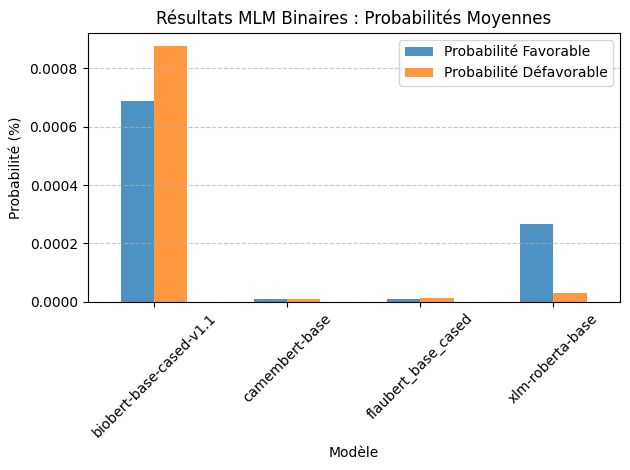

<Figure size 1200x600 with 0 Axes>

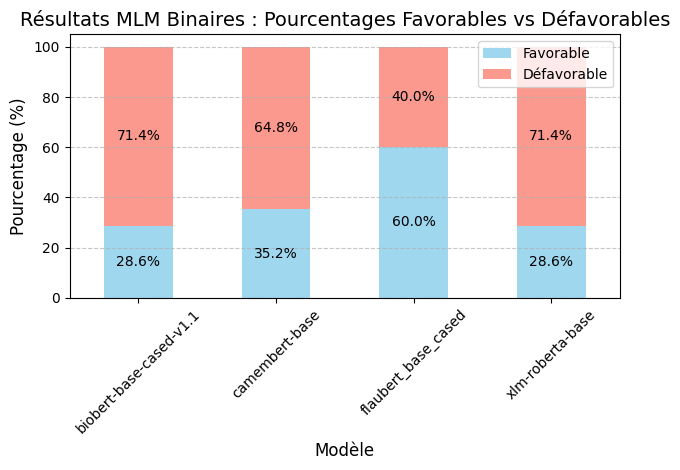

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les résultats binaires
chemin_resultats_binaire = "/content/drive/MyDrive/impress/benchmark_results.csv"
resultats_binaires = pd.read_csv(chemin_resultats_binaire)

# Résumé et visualisation des résultats binaires
def resumer_resultats_binaires(resultats_binaires):
    """
    Résume les probabilités moyennes pour les réponses favorables et défavorables par modèle.
    """
    # Calcul des moyennes par modèle
    resume_binaire = resultats_binaires.groupby("Model")[["Favorable Probability", "Unfavorable Probability"]].mean()
    resume_binaire *= 100  # Convertir les probabilités en pourcentages

    # Visualiser les résultats sous forme de graphique
    plt.figure(figsize=(10, 6))
    resume_binaire.plot(kind="bar", alpha=0.8)
    plt.title("Résultats MLM Binaires : Probabilités Moyennes")
    plt.ylabel("Probabilité (%)")
    plt.xlabel("Modèle")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(["Probabilité Favorable", "Probabilité Défavorable"])
    plt.tight_layout()
    plt.show()

    return resume_binaire

# Analyse détaillée des réponses favorables vs défavorables dans les résultats binaires
def analyser_reponses_binaires(resultats_binaires):
    """
    Identifie et visualise les réponses favorables vs défavorables sélectionnées par les modèles.
    """
    # Identifier les réponses sélectionnées (favorable ou défavorable)
    resultats_binaires["Selected Answer"] = resultats_binaires.apply(
        lambda row: "Favorable" if row["Favorable Probability"] > row["Unfavorable Probability"] else "Unfavorable",
        axis=1
    )

    # Compter les réponses favorables et défavorables par modèle
    compte_reponses = resultats_binaires.groupby(["Model", "Selected Answer"]).size().unstack(fill_value=0)

    # Calculer les pourcentages
    pourcentage_reponses = compte_reponses.div(compte_reponses.sum(axis=1), axis=0) * 100

    # Visualiser les résultats sous forme de graphique empilé
    plt.figure(figsize=(12, 6))
    pourcentage_reponses.plot(
        kind="bar",
        stacked=True,
        alpha=0.8,
        color=["skyblue", "salmon"]
    )

    # Ajouter des étiquettes de pourcentages
    for i, row in enumerate(pourcentage_reponses.iterrows()):
        model, pourcentages = row
        favorable_pct = pourcentages["Favorable"]
        unfavorable_pct = pourcentages["Unfavorable"]

        plt.text(i, favorable_pct / 2, f"{favorable_pct:.1f}%", ha="center", va="center", color="black")
        plt.text(i, favorable_pct + unfavorable_pct / 2, f"{unfavorable_pct:.1f}%", ha="center", va="center", color="black")

    # Mise en forme du graphique
    plt.title("Résultats MLM Binaires : Pourcentages Favorables vs Défavorables", fontsize=14)
    plt.ylabel("Pourcentage (%)", fontsize=12)
    plt.xlabel("Modèle", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(["Favorable", "Défavorable"], fontsize=10, loc="upper right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Exécuter les fonctions pour analyser les résultats
resume_binaires = resumer_resultats_binaires(resultats_binaires)
analyser_reponses_binaires(resultats_binaires)

### Résultat par catégories

In [ ]:
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
from tqdm import tqdm

# Chemin du fichier de benchmark
benchmark_csv_path = "/content/drive/MyDrive/impress/benchmark_francophone_mlm_accompagnement_psychiatrique_sécuritaire.csv"

# Charger les données de benchmark
benchmark_data = pd.read_csv(benchmark_csv_path)

# Liste des modèles fine-tunés
model_paths = {
    "camembert-base": "/content/drive/MyDrive/impress/modèles/camembert-base",
    "flaubert_base_cased": "/content/drive/MyDrive/impress/modèles/flaubert_base_cased",
    "xlm-roberta-base": "/content/drive/MyDrive/impress/modèles/xlm-roberta-base",
    "biobert-base-cased-v1.1": "/content/drive/MyDrive/impress/modèles/biobert",
}

# Prétraiter les prompts en fonction du token de masquage
def preprocess_prompts(benchmark_data, mask_token):
    """
    Remplace le token de masquage générique dans les prompts par celui du modèle.
    """
    benchmark_data['prompt'] = benchmark_data['prompt'].str.replace("[MASK]", mask_token, regex=False)
    benchmark_data['prompt'] = benchmark_data['prompt'].str.replace("<mask>", mask_token, regex=False)
    benchmark_data = benchmark_data.dropna(subset=['prompt'])
    return benchmark_data

# Charger un modèle et un tokenizer
def load_model_and_tokenizer(model_path):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForMaskedLM.from_pretrained(model_path).to("cuda")
    return tokenizer, model

# Évaluer les modèles
def evaluate_models(benchmark_data, model_paths):
    results = []

    for model_name, model_path in model_paths.items():
        print(f"Évaluation du modèle : {model_name}")
        try:
            tokenizer, model = load_model_and_tokenizer(model_path)

            # Obtenir le token de masquage spécifique au modèle
            mask_token = tokenizer.mask_token
            if not mask_token:
                print(f"Attention : pas de token de masquage pour le modèle {model_name}.")
                continue

            # Prétraiter les prompts avec le token de masquage du modèle
            model_benchmark_data = preprocess_prompts(benchmark_data.copy(), mask_token)

            for _, row in tqdm(model_benchmark_data.iterrows(), total=len(model_benchmark_data), desc=f"Évaluation - {model_name}"):
                prompt = row['prompt']
                category = row['category']  # Assurez-vous que la colonne "category" existe
                favorable_answer = row['favorable'].strip('"')
                unfavorable_answer = row['unfavorable'].strip('"')

                # Tokenisation
                inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)
                inputs = {key: val.to(model.device) for key, val in inputs.items()}

                # Prédictions
                with torch.no_grad():
                    outputs = model(**inputs)
                    logits = outputs.logits

                # Identifier le token de masquage
                mask_token_index = torch.where(inputs['input_ids'] == tokenizer.mask_token_id)[1]

                if mask_token_index.numel() == 0:
                    print(f"Aucun token {mask_token} trouvé dans le prompt : '{prompt}'")
                    continue

                mask_logits = logits[0, mask_token_index, :]

                # Obtenir les IDs des réponses favorables et défavorables
                favorable_id = tokenizer.convert_tokens_to_ids(favorable_answer)
                unfavorable_id = tokenizer.convert_tokens_to_ids(unfavorable_answer)

                if favorable_id is None or unfavorable_id is None:
                    print(f"Tokens introuvables dans le vocabulaire : '{favorable_answer}', '{unfavorable_answer}'")
                    continue

                # Probabilités
                favorable_prob = torch.softmax(mask_logits, dim=1)[0, favorable_id].item()
                unfavorable_prob = torch.softmax(mask_logits, dim=1)[0, unfavorable_id].item()

                # Sauvegarder les résultats
                results.append({
                    "Model": model_name,
                    "Prompt": prompt,
                    "Category": category,
                    "Favorable Answer": favorable_answer,
                    "Unfavorable Answer": unfavorable_answer,
                    "Favorable Probability": favorable_prob,
                    "Unfavorable Probability": unfavorable_prob
                })
        except Exception as e:
            print(f"Erreur avec le modèle {model_name} : {e}")

    return pd.DataFrame(results)

# Évaluer les modèles
results = evaluate_models(benchmark_data, model_paths)

# Sauvegarder les résultats
output_csv_path = "/content/drive/MyDrive/impress/benchmark_results_with_categories.csv"
results.to_csv(output_csv_path, index=False)
print("\n", f"Résultats sauvegardés à : {output_csv_path}")

# Analyse par catégorie
def calculate_category_performance(results):
    """
    Calcule les performances spécifiques à chaque catégorie.
    """
    results["Is Favorable Selected"] = results["Favorable Probability"] > results["Unfavorable Probability"]
    category_performance = results.groupby(["Category", "Model"])["Is Favorable Selected"].mean() * 100
    category_performance = category_performance.unstack("Model")
    return category_performance

# Calculer et visualiser les performances par catégorie
category_performance = calculate_category_performance(results)

# Sauvegarder les résultats par catégorie
category_output_csv = "/content/drive/MyDrive/impress/category_performance_results.csv"
category_performance.to_csv(category_output_csv)
print("\n", f"Résultats par catégorie sauvegardés à : {category_output_csv}")


Évaluation du modèle : camembert-base


Évaluation - camembert-base: 100%|██████████| 105/105 [00:00<00:00, 114.22it/s]


Évaluation du modèle : flaubert_base_cased


Évaluation - flaubert_base_cased: 100%|██████████| 105/105 [00:01<00:00, 80.98it/s]


Évaluation du modèle : xlm-roberta-base


Évaluation - xlm-roberta-base: 100%|██████████| 105/105 [00:01<00:00, 76.12it/s]


Évaluation du modèle : biobert-base-cased-v1.1


Évaluation - biobert-base-cased-v1.1: 100%|██████████| 105/105 [00:00<00:00, 109.47it/s]


 Résultats sauvegardés à : /content/drive/MyDrive/impress/benchmark_results_with_categories.csv

 Résultats par catégorie sauvegardés à : /content/drive/MyDrive/impress/category_performance_results.csv


Category-wise performance (Table 1) saved to: /content/drive/MyDrive/impress/table1_category_performance.csv

Category-wise favorable response rates (Table 1):
Model                   biobert-base-cased-v1.1  camembert-base  \
Category                                                          
Anxiété généralisée                        50.0            50.0   
Anxiété sociale                            20.0            20.0   
Conduites alimentaires                     30.0            40.0   
Dépression                                 20.0            50.0   
Gestion de la colère                       20.0            20.0   
Insomnie                                   50.0            60.0   
Psychose                                    0.0             0.0   
Relaxation progressive                     40.0            40.0   
Thérapie des schémas                       10.0            10.0   
Trouble bipolaire                          40.0            50.0   
Trouble panique                     

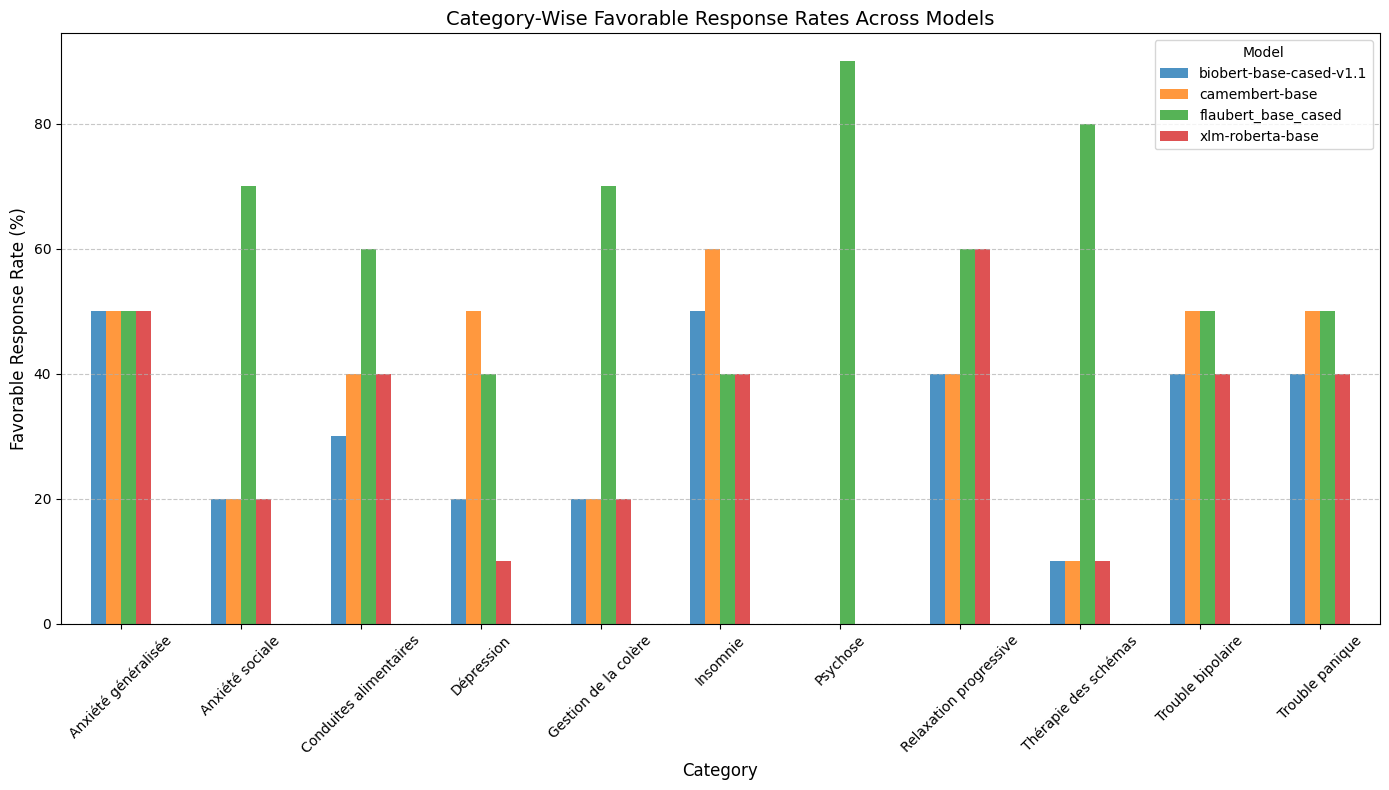

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results
results_csv_path = "/content/drive/MyDrive/impress/benchmark_results_with_categories.csv"
results = pd.read_csv(results_csv_path)

# Calculate category-wise performance
def calculate_category_performance(results):
    """
    Calculates the percentage of favorable responses for each model within each category.
    """
    results["Is Favorable Selected"] = results["Favorable Probability"] > results["Unfavorable Probability"]
    category_performance = results.groupby(["Category", "Model"])["Is Favorable Selected"].mean() * 100
    return category_performance.unstack("Model")

# Generate Table 1 (Category-wise favorable response rates)
category_performance = calculate_category_performance(results)

# Save Table 1 to a CSV file for future reference
table1_csv_path = "/content/drive/MyDrive/impress/table1_category_performance.csv"
category_performance.to_csv(table1_csv_path)
print(f"Category-wise performance (Table 1) saved to: {table1_csv_path}")

# Display Table 1
print("\nCategory-wise favorable response rates (Table 1):")
print(category_performance)

# Visualization of category-wise performance
def plot_category_performance(category_performance):
    """
    Visualizes the favorable response rates for each model across categories.
    """
    category_performance.plot(kind="bar", figsize=(14, 8), alpha=0.8)
    plt.title("Category-Wise Favorable Response Rates Across Models", fontsize=14)
    plt.ylabel("Favorable Response Rate (%)", fontsize=12)
    plt.xlabel("Category", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(title="Model", fontsize=10, loc="upper right")
    plt.tight_layout()
    plt.show()

# Plot the results
plot_category_performance(category_performance)

### Analyse d'erreurs

Error Summary by Category and Model:
Model                   biobert-base-cased-v1.1  camembert-base  \
Category                                                          
Anxiété généralisée                           5               5   
Anxiété sociale                               7               7   
Conduites alimentaires                        6               6   
Dépression                                    4               4   
Gestion de la colère                          7               7   
Insomnie                                      4               4   
Psychose                                      9               9   
Relaxation progressive                        3               3   
Thérapie des schémas                          8               8   
Trouble bipolaire                             5               5   
Trouble panique                               5               5   

Model                   flaubert_base_cased  xlm-roberta-base  
Category                   

<Figure size 1200x800 with 0 Axes>

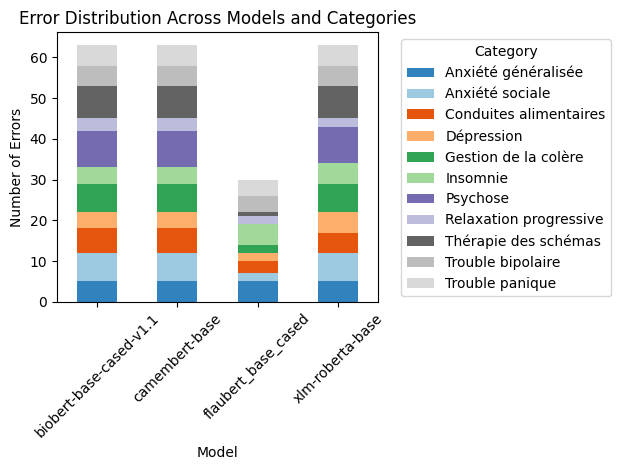


Sample Errors for Model: flaubert_base_cased, Category: Psychose

Empty DataFrame
Columns: [Prompt, Selected Response, Favorable Answer, Unfavorable Answer]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the benchmark results
results_path = "/content/drive/MyDrive/impress/benchmark_results_with_categories.csv"
benchmark_results = pd.read_csv(results_path)

# Define a function to analyze and categorize errors
def error_analysis(benchmark_results):
    """
    Analyzes the errors made by each model in terms of unfavorable responses and categorizes them.
    """
    errors = []
    for _, row in benchmark_results.iterrows():
        # Determine if the unfavorable response was selected
        if row["Unfavorable Probability"] > row["Favorable Probability"]:
            errors.append({
                "Model": row["Model"],
                "Category": row["Category"],
                "Prompt": row["Prompt"],
                "Selected Response": "Unfavorable",
                "Favorable Answer": row["Favorable Answer"],
                "Unfavorable Answer": row["Unfavorable Answer"]
            })

    error_df = pd.DataFrame(errors)
    return error_df

# Perform the error analysis
error_df = error_analysis(benchmark_results)

# Analyze errors by category and model
def summarize_errors(error_df):
    """
    Summarizes errors by category and model to identify specific trends.
    """
    category_errors = error_df.groupby(["Category", "Model"]).size().unstack(fill_value=0)
    return category_errors

# Visualize the error distribution
def plot_error_distribution(error_df):
    """
    Visualizes the distribution of errors by model and category.
    """
    # Count errors by model and category
    error_counts = error_df.groupby("Model")["Category"].value_counts().unstack(fill_value=0)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    error_counts.plot(kind="bar", stacked=True, cmap="tab20c")
    plt.title("Error Distribution Across Models and Categories")
    plt.ylabel("Number of Errors")
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Perform error analysis
category_error_summary = summarize_errors(error_df)
print("Error Summary by Category and Model:")
print(category_error_summary)

# Plot error distribution
plot_error_distribution(error_df)

# Specific error examples for further analysis
def display_sample_errors(error_df, model_name, category_name, n=5):
    """
    Displays sample errors for a given model and category.
    """
    filtered_errors = error_df[(error_df["Model"] == model_name) &
                               (error_df["Category"] == category_name)].head(n)
    print(f"\nSample Errors for Model: {model_name}, Category: {category_name}\n")
    print(filtered_errors[["Prompt", "Selected Response", "Favorable Answer", "Unfavorable Answer"]])

# Example: Display sample errors for "FlauBERT" in "Psychose"
display_sample_errors(error_df, model_name="flaubert_base_cased", category_name="Psychose")